In [2]:
from google.colab import files
uploaded = files.upload()

Saving train1.csv to train1.csv


In [8]:
import numpy as np
import pandas as pd
train=pd.read_csv('train1.csv')
# test=pd.read_csv('test.csv')

Housing pricing and ifomation about house in Ames, Iowa(USA)

Our Aim in this project is to predict the final price of each house 

In [ ]:
print("Train data shape:",train.shape)
print("Test data shape:",test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


the test data has a column more ro display the result

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
import matplotlib.pyplot as plt
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize']=(10,6)

In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

With the describe funtion, we can see much about in data column. Here, the average price of houses is about $800 921 and the min and max value are $34900 and $755000 respectively and 1460 rows.

next we check for skewness which we will convert the value to log inorder to improve the linearity of the function

skew is: 1.8828757597682129


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

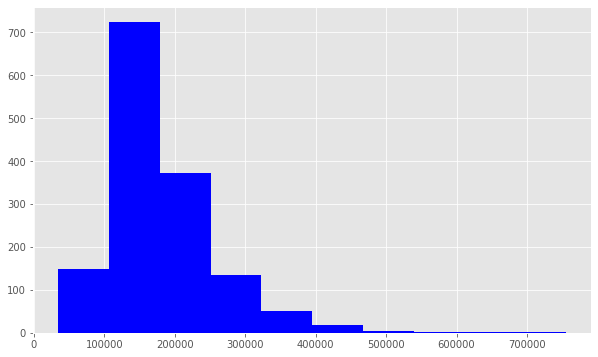

In [7]:
print("skew is:",train.SalePrice.skew())
plt.hist(train.SalePrice,color='blue')

skew is: 0.12133506220520406


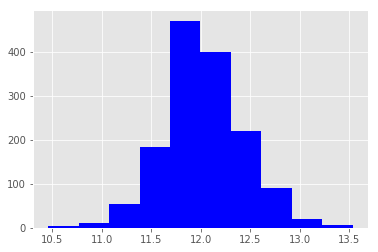

In [ ]:
target= np.log(train.SalePrice)
print("skew is:",target.skew())
plt.hist(target, color='blue')
plt.show()

WORKING WITH NUMERICAL FEATURES

We have a number much closer to zero after converting to log, which means we have improved our skewness

In [ ]:
#this function below is used to get the type of the numerical data
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [ ]:
#shows the relationship between columns 
corr=numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [ ]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The overall data are interger values with interval from 1 to 10

In [ ]:
quality_pivot=train.pivot_table(index= 'OverallQual',
                                values='SalePrice', aggfunc=np.median)

In [ ]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


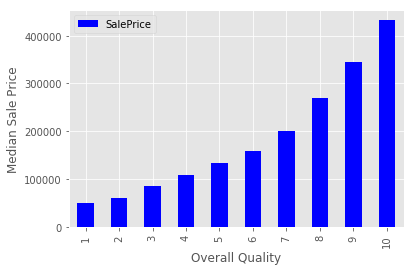

In [ ]:
quality_pivot.plot(kind ='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
#plt.xtick(rotation=45)
plt.show()

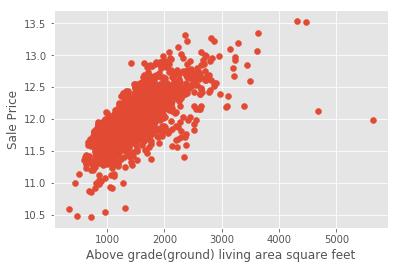

In [ ]:
plt.scatter(x=train['GrLivArea'],y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade(ground) living area square feet')
plt.show()

We can see an increase in sale price corresponds to increase in living area

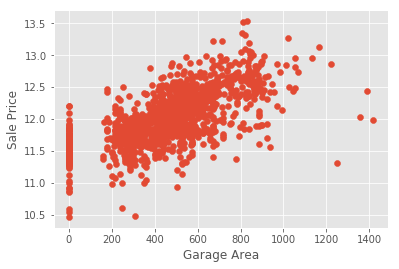

In [ ]:
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see that a few house are on the zero mark for garage indicating that they dont have. We will confirm this later on

Next step is to remove outliers so as not to get inaccurate regression model

In [ ]:
train=train[train['GarageArea']<1200]

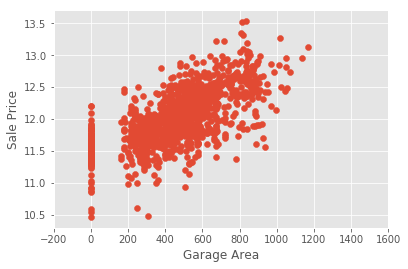

In [ ]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))
plt.xlim(-200, 1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Handling null Values

In [ ]:
nulls= pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['Null Count']
nulls.index.name='Features'
nulls

,Null Count
Features,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [ ]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [ ]:
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [ ]:
print("Orignal: \n")
print(train.Street.value_counts(), "\n")

Orignal: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



create new column to transform the data into bolean

In [9]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
#test['enc_street']=pd.get_dummies(train.Street, drop_first=True)

In [ ]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


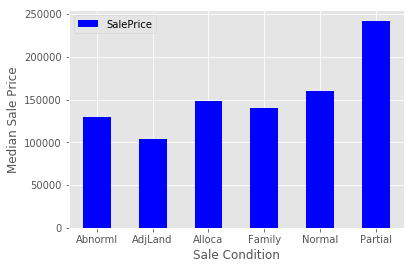

In [ ]:
condition_pivot =train.pivot_table(index = "SaleCondition", values='SalePrice', aggfunc=np.median)                                   
condition_pivot.plot(kind ='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price') 
plt.xticks(rotation=0)
plt.show()

In [10]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition']=train.SaleCondition.apply(encode)
#test['enc_condition']=test.SaleCondition.apply(encode)

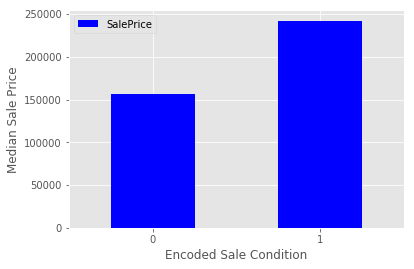

In [ ]:
condition_pivot =train.pivot_table(index = "enc_condition", values='SalePrice', aggfunc=np.median)                                   
condition_pivot.plot(kind ='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [11]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() !=0)

0

<p> Building a linear model</p>

In [12]:
y=np.log(train.SalePrice)
X= data.drop(['SalePrice','Id'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state= 42, test_size=.33)

In [14]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [15]:
model= lr.fit(X_train, y_train,y_train)

In [16]:
print("R^2 is:\n", model.score(X_test, y_test))

R^2 is:
 0.8654124583373178


In [18]:
predictions= model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
print('RMSE is \n', mean_squared_error (y_test, predictions))

RMSE is 
 0.022937940902518574


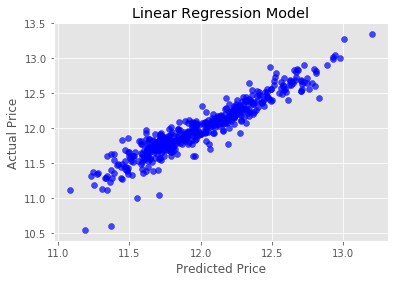

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
predictions.plot.kde(label='predicted', legend=True)
actual_values.plot.kde(label='actual', legend=True,figsize = (8,5.5))
plt.xlabel('Price')
plt.ylabel('space')

plt.xticks(np.arange(0.0, 5.1, 0.5))
plt.xlim(0.0, 5.0)
plt.title('Difference in Fandango movie rating', fontsize=25, y=1.07)

AttributeError: ignored

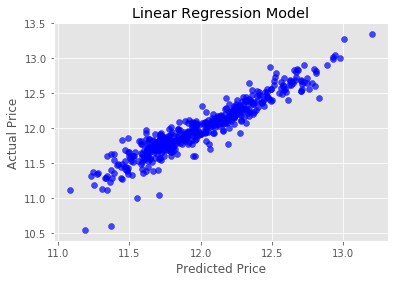

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

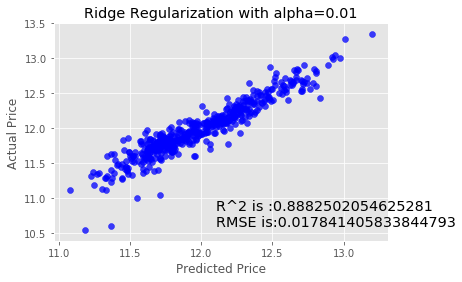

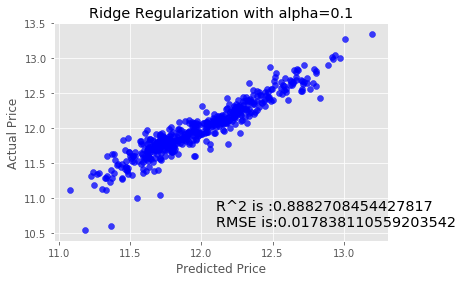

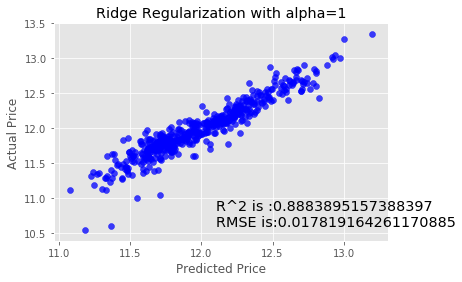

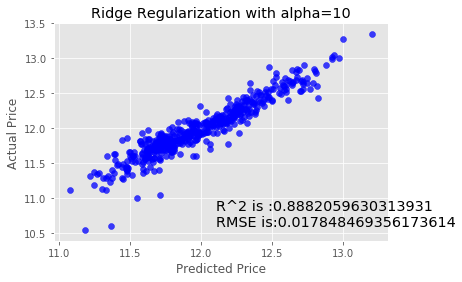

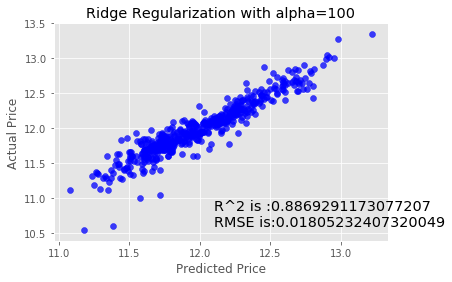

In [ ]:
for i in range(-2,3):
    alpha= 10**i
    rm=linear_model.Ridge(alpha=alpha)
    ridge_model=rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha={}'. format(alpha))
    overlay= 'R^2 is :{}\nRMSE is:{}'.format(
                  ridge_model.score(X_test,y_test),
                  mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1,10.6), size='x-large')
    plt.show()
    

Adding more features to our data since the different alpha numbers had little effect

In [ ]:
submission=pd.DataFrame()
submission['id']= test.Id

In [ ]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'],axis=1).interpolate()

In [ ]:
predictions = model.predict(feats)

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print("Original predictions are:\n", predictions[:5],"\n")
print("Final predictions are:\n", final_predictions[:5])      

Original predictions are:
 [11.76810976 11.72758634 12.07666908 12.2062551  12.11442371] 

Final predictions are:
 [129069.94683234 123944.14989588 175723.86262344 200036.49399745
 182485.08209715]


In [ ]:
Original predictions are:
    [11.76725362 11.71929504 12.07694485 12.2067644 12.1121784]
Final predictions are:
    [128959.49176363 122920.7408832 175704.8257934 200050.832453  182075.4986405]

SyntaxError: invalid syntax (<ipython-input-45-6362d8655c24>, line 1)

In [ ]:
submission['SalePrice']= final_predictions
submission.head()